In [1]:
import boto3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from io import StringIO
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score

from cancellation_model import CancellationModel, load_training_data, load_prediction_data


In [2]:
train = load_training_data()
test = load_prediction_data()

/home/vkocheganov/virtualenvironment/nn_course/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=10
params['thres'] = 0.8
model = CancellationModel({"model_type": "lgb", "train_params" : params, "epocs" : 100})

In [4]:
model.train(train)


country_code
provider_code_encoded
[LightGBM] [Warning] Unknown parameter: thres
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: thres
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 241185, number of negative: 765903
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of data points in the train set: 1007088, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239488 -> initscore=-1.155491
[LightGBM] [Info] Start training from score -1.155491
trained scores:  0.8628405078402579 0.8614159933222741


In [5]:
train_data, validation_data = train_test_split(
            train, test_size=0.3, random_state=1)
model.preprocess(train_data)

country_code
provider_code_encoded


/home/vkocheganov/Development/FH/AD/cancellation/cancellation_model.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].astype(


,total_rate_usd,day_distance,nightly_rate_usd,length_of_stay,country_code,absolute_hotel_position,has_free_cancellation,session_nb_page_views,search_country_code,browser,os,session_locale,commission,can_pay_later,cancelled,provider_code_encoded,session_referrer_name_encoded
1315372,41.698970,92.0,13.057436,2.0,MA,1.0,False,2.0,MA,Chrome Mobile,Android,"""fr""",3.578500,False,1,LYS,LCT
156013,59.899500,0.0,53.286500,1.0,US,NaN,True,1.0,US,Chrome Mobile,Android,"""en""",5.411547,True,0,EVT,FKX
1363093,11.228500,0.0,10.205012,1.0,MY,1.0,False,2.0,MY,Chrome Mobile,Android,"""en""",0.649297,False,0,OMK,FKX
337970,34.884000,0.0,24.250500,1.0,US,NaN,False,2.0,US,Chrome Mobile,Android,"""en""",0.770947,False,0,OMK,FKX
1058574,339.460619,0.0,270.053693,2.0,IT,1.0,False,4.0,DE,Chrome Mobile,Android,"""de""",31.059000,True,0,LYS,LWR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836489,64.847412,1.0,65.025000,1.0,US,1.0,True,2.0,US,Chrome Mobile WebView,Android,"""en""",4.828000,True,0,LYS,FKX
491263,19.448000,0.0,16.110399,1.0,TH,3.0,False,3.0,TH,Samsung Internet,Android,"""en""",1.512859,False,0,OMK,FKX
470924,83.818500,2.0,75.854000,1.0,US,1.0,False,4.0,US,Mobile Safari,iOS,"""en""",0.552019,False,0,OMK,FKX
491755,NaN,0.0,44.514500,2.0,US,1.0,False,2.0,US,Chrome Mobile,Android,"""en""",1.966431,False,1,OMK,FKX


In [6]:
model.predict(train_data, _preprocess = False)


(array([0.83350907, 0.09654702, 0.02311984, ..., 0.07526703, 0.14826541,
        0.9491945 ]),
 1315372    1
 156013     0
 1363093    0
 337970     0
 1058574    0
           ..
 836489     0
 491263     0
 470924     0
 491755     1
 128037     1
 Name: cancelled, Length: 1007088, dtype: int64)

In [7]:
X_test = pd.DataFrame()
X_test['pred'], X_test['cancelled'] = model.predict(test)

country_code
provider_code_encoded


In [8]:
X_test.pred.sum()/X_test.cancelled.sum()


1.0006962962194539

In [9]:

print(X_test['pred'])
model_saved = "model.pkl"
model.dump(model_saved)
loaded_model = CancellationModel.load(model_saved)
X_test['pred'], X_test['cancelled'] = loaded_model.predict(test)
print(X_test['pred'])


0         0.943053
1         0.946952
2         0.112062
3         0.284907
4         0.123722
            ...   
616581    0.108862
616582    0.043176
616583    0.044882
616584    0.327695
616585    0.102867
Name: pred, Length: 616586, dtype: float64
dumping
loading
loaded scores =  0.8628405 0.86141599
country_code
provider_code_encoded
0         0.943053
1         0.946952
2         0.112062
3         0.284907
4         0.123722
            ...   
616581    0.108862
616582    0.043176
616583    0.044882
616584    0.327695
616585    0.102867
Name: pred, Length: 616586, dtype: float64


In [10]:
model.score(X_test['cancelled'], X_test['pred'])

0.8625719535033165

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

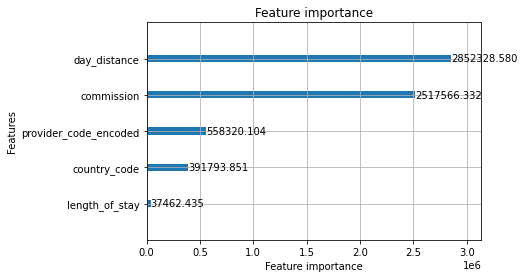

In [11]:
lgb.plot_importance(model.model, ignore_zero = False, importance_type='gain')

In [12]:
train.columns


Index(['total_rate_usd', 'day_distance', 'nightly_rate_usd', 'length_of_stay',
       'country_code', 'absolute_hotel_position', 'has_free_cancellation',
       'session_nb_page_views', 'search_country_code', 'browser', 'os',
       'session_locale', 'commission', 'can_pay_later', 'cancelled',
       'provider_code_encoded', 'session_referrer_name_encoded'],
      dtype='object')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

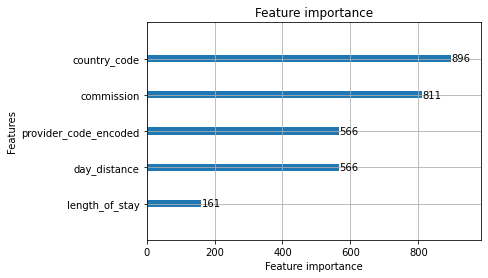

In [13]:
lgb.plot_importance(model.model, ignore_zero = False, importance_type='split')